In [18]:
import sklearn
import keras
import os
import numpy as np

from tensorflow.keras.preprocessing import image
import pandas as pd
import cv2
from PIL import Image
import pandas as pd
from os import listdir
from os.path import isfile, join

In [58]:
#img_path = 'images/memory_test_images/redpanda-n02509815/n02509815_3303.jpeg'
img_path = 'images/memory_test_images/banana-n07753592/n07753592_11732.jpeg'

In [62]:
def read_process_image(path, transformation):
    """
    Reads an image and performs the desired transformation
    """
    #img = cv2.imread(path,cv2.IMREAD_COLOR)
    try:
        img = image.load_img(path, target_size=(224, 224))
    except:
        return None, None
    img = image.img_to_array(img)

    if img is None:
        return None, None
    rows,cols, channels = img.shape

    if transformation == 'translate':
        x_translate = 1
        y_translate = 1
        M = np.float32([[1,0,x_translate],[0,1,y_translate]]) # translation
        res = cv2.warpAffine(img,M,(cols,rows))
        
    if transformation == 'scale':
        scale_x = 1 # Reduce x by 1 pixel
        scale_y = 1
        res = cv2.resize(img,(cols - scale_x, rows - scale_y), interpolation = cv2.INTER_LINEAR)
        
    if transformation == 'rotate_180': # Rotates 180 deg
        res = cv2.rotate(img, cv2.ROTATE_180)
        
    if transformation == 'rotate_90': # Rotates 90 deg
        res = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        
    if transformation == 'horizontal_flip':
        res = cv2.flip(img, 1)


    #res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    #res = Image.fromarray(res)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = np.expand_dims(img, axis=0)
    #img = Image.fromarray(img)
    return img, res

In [51]:
trans_list = ['translate', 'scale', 'rotate_180', 'rotate_90', 'horizontal_flip']
#for transformation in trans_list:
#    img, res = read_process_image(img_path, transformation)
img, res = read_process_image(img_path, 'scale')

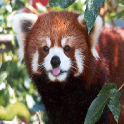

In [52]:
Image.fromarray(res.astype(np.uint8))

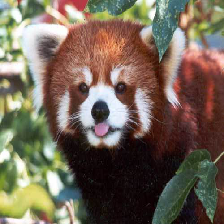

In [53]:
Image.fromarray(img.astype(np.uint8))

In [60]:
def predict(model, img, img_transformed):
    """
    Given a model, an image and a transformed image, generate the predictions
    """
    k = 10
    # Original
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(img)

    preds = model.predict(x)
    print('Original:', decode_predictions(preds, top=10)[0])
    pred_orig = decode_predictions(preds, top=k)[0]
    top1_class_orig_pred = pred_orig[0][1]
    
    # Transformed 
    x = np.expand_dims(img_transformed, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    print('Transformed:', decode_predictions(preds, top=k)[0])
    pred_trans = decode_predictions(preds, top=k)[0]
    top1_class_trans_pred = pred_trans[0][1]
    
    top1_changed, top1_delta, avg_delta = preds_comparison(pred_orig, pred_trans)
    return top1_changed, top1_delta, avg_delta, top1_class_orig_pred, top1_class_trans_pred

In [55]:
import sklearn
import keras
import os
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
import numpy as np
import pandas as pd
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

#from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions
# MobileNet?
import cv2
from PIL import Image
import pandas as pd
from os import listdir
from os.path import isfile, join

In [57]:
model = InceptionV3(weights='imagenet')

In [63]:
img, res = read_process_image(img_path, 'scale')
predict(model, img, res)

Original: [('n07753592', 'banana', 0.99459416), ('n01945685', 'slug', 0.005404797), ('n01944390', 'snail', 8.9700734e-07), ('n02526121', 'eel', 1.9354932e-08), ('n02174001', 'rhinoceros_beetle', 1.2852749e-08), ('n02219486', 'ant', 1.150262e-08), ('n01924916', 'flatworm', 8.275629e-09), ('n01943899', 'conch', 7.4087527e-09), ('n07720875', 'bell_pepper', 3.90837e-09), ('n03532672', 'hook', 2.6475133e-09)]
Transformed: [('n01945685', 'slug', 0.9879511), ('n07753592', 'banana', 0.012024217), ('n02526121', 'eel', 1.2856887e-05), ('n01944390', 'snail', 1.0653886e-05), ('n01943899', 'conch', 2.7943315e-07), ('n13054560', 'bolete', 1.6661595e-07), ('n01924916', 'flatworm', 1.497338e-07), ('n02174001', 'rhinoceros_beetle', 1.4850947e-07), ('n07717556', 'butternut_squash', 7.689786e-08), ('n07720875', 'bell_pepper', 7.2276755e-08)]


NameError: name 'preds_comparison' is not defined

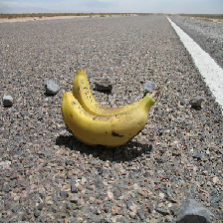

In [67]:
img, res = read_process_image(img_path, 'scale')
Image.fromarray(res.astype(np.uint8))